### Codio Activity 14.4:  Using Entropy

**Expected Time = 60 minutes**

**Total Points = 50**

### This activity focuses on using *entropy* to split nodes in a Decision Tree.  First, you will compute entropy by hand on a small example dataset.  Next, you will use the `DecisionTreeClassifier` to split based on an entropy criteria. 


$$\displaystyle H=-\sum _{i}p_{i}\log p_{i}$$

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

### Sample Data

### Below, the same small titanic dataset is created for your with five rows, and assigned as `titanic` below.  

In [17]:
titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()

In [18]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [20]:
titanic.pclass.value_counts()

3    3
1    2
Name: pclass, dtype: int64

In [19]:
X, y = titanic.drop('survived', axis = 1), titanic.survived

[Back to top](#-Index)

### Problem 1

#### Computing the Entropy

**10 Points**

### To begin, the entropy of the data is determined by computing the probability for each class and plugging it into the `entropy` formula.  Use the data in `df` to compute the entropy for all the data and assign it as a float to `all_entropy` below. 

**NOTE**:  use `np.log2` to compute the logarithm. 

In [5]:
### GRADED

all_entropy = ''

### BEGIN SOLUTION
all_entropy = -(.4*np.log2(.4) + .6*np.log2(0.6))
### END SOLUTION

# Answer check
print(all_entropy)

0.9709505944546686


In [6]:
### BEGIN HIDDEN TESTS
all_entropy_ = -(.4*np.log2(.4) + .6*np.log2(0.6))
#
#
#
assert all_entropy == all_entropy_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Splitting Data

**10 Points**

Now, consider splitting the data where `pclass = 1`.   

Compute the entropy for each dataframe as `ent_pclass1` where `pclass < 2` is `True` and `ent_pclass3` respectively.  

In [7]:
### GRADED

ent_pclass1 = None
ent_pclass3 = None

### BEGIN SOLUTION
ent_pclass1 = -1*np.log2(1)
ent_pclass3 = -(2/3*np.log2(2/3) + 1/3*np.log2(1/3))
### END SOLUTION

# Answer check
print(f'Left node: {ent_pclass1: .2f}\nRight Node: {ent_pclass3: .2f}')

Left node: -0.00
Right Node:  0.92


In [8]:
### BEGIN HIDDEN TESTS
ent_pclass1_ = -1*np.log2(1)
ent_pclass3_ = -(2/3*np.log2(2/3) + 1/3*np.log2(1/3))
#
#
#
assert ent_pclass1 == ent_pclass1_
assert ent_pclass3 == ent_pclass3_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Weighting the Entropy

**10 Points**

Because the split doesn't produce equal sized groups, we want to weight the entropy based on the size of the data in the node.  Use the proportion of data in the respective nodes to compute the total entropy by summing the weighted entropy values below. Assign as a float to `pclass_entropy` below. 

In [9]:
### GRADED

pclass_entropy = ''

### BEGIN SOLUTION
gini_pclass1 = 1 - 1 - 0
gini_pclass3 = 1 - (2/3)**2 - (1/3)**2
pclass_entropy = 2/5*gini_pclass1 + 3/5*gini_pclass3
### END SOLUTION

# Answer check
print(f'Entropy for passenger class: {pclass_entropy: .2f}')

Entropy for passenger class:  0.27


In [10]:
### BEGIN HIDDEN TESTS
_gini_pclass1 = 1 - 1 - 0
_gini_pclass3 = 1 - (2/3)**2 - (1/3)**2
_pclass_entropy = 2/5*_gini_pclass1 + 3/5*_gini_pclass3
#
#
#
tolerance = 0.0 #1e-6
assert np.isclose(pclass_entropy, _pclass_entropy, rtol=tolerance, atol=tolerance)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### Entropy based on `age < 23`

**10 Points**

Compute the weighted sum of the entropy based on splitting based on `age < 23`.  Assign this to `entropy_age` below.  

In [11]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [12]:
### GRADED

entropy_age = ''

### BEGIN SOLUTION
ent_age1 = 0
ent_age2 = -(1/4*np.log2(1/4) + 3/4*np.log2(3/4))
entropy_age = 4/5*ent_age2 + 1/5*ent_age1
### END SOLUTION

# Answer check
print(entropy_age)

0.6490224995673063


In [13]:
### BEGIN HIDDEN TESTS
ent_age1_ = 0
ent_age2_ = -(1/4*np.log2(1/4) + 3/4*np.log2(3/4))
entropy_age_ = 4/5*ent_age2_ + 1/5*ent_age1_
#
#
#
assert entropy_age == entropy_age_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 5

#### Minimizing Entropy

**10 Points**

Use the `DecisionTreeClassifier` to fit the data with `max_depth = 1` and `criterion = 'entropy'`.  What does the estimator identify as the optimal splitting criterion? Assign the plot of the tree including the feature names and nodes filled to `entropy_tree` below.  

[Text(0.5, 0.75, 'pclass <= 2.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]')]

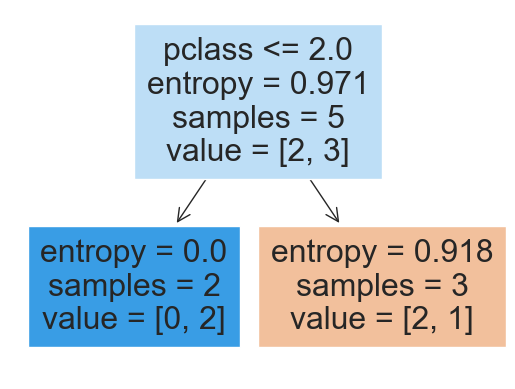

In [14]:
### GRADED

entropy_tree = ''

### BEGIN SOLUTION
dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 1).fit(X, y)
entropy_tree = plot_tree(dtree, feature_names=X.columns, filled = True)
### END SOLUTION

# Answer check
entropy_tree

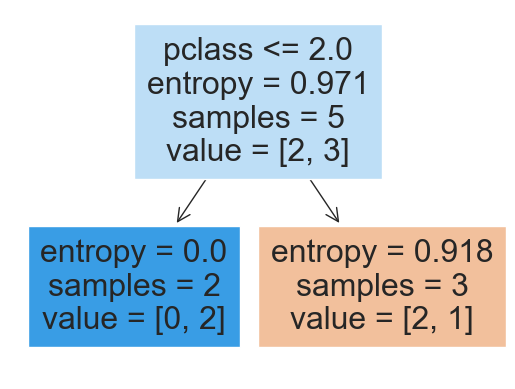

In [15]:
### BEGIN HIDDEN TESTS
dtree_ = DecisionTreeClassifier(criterion='entropy', max_depth = 1).fit(X, y)
entropy_tree_ = plot_tree(dtree_, feature_names=X.columns, filled = True)

#
#
#
for stu, ans in zip(entropy_tree, entropy_tree_):
    assert stu.get_text() == ans.get_text()
### END HIDDEN TESTS